In [1]:
import pandas as pd

In [4]:
data = pd.read_csv('../Data/churn_analysis.csv')

In [5]:
data.head()

,Unnamed: 0,state,account_length,area_code,intl_plan,vmail_plan,vmail_message,day_mins,day_calls,day_charge,...,night_mins,night_calls,night_charge,intl_mins,intl_calls,intl_charge,custserv_calls,treatment,mes_estim,churn
0,0,KS,128,415,no,yes,25,265.1,110,45.07,...,244.7,91,11.01,10.0,3,2.70,1,1,0.65,False.
1,1,OH,107,415,no,yes,26,161.6,123,27.47,...,254.4,103,11.45,13.7,3,3.70,1,0,0.55,False.
2,2,NJ,137,415,no,no,0,243.4,114,41.38,...,162.6,104,7.32,12.2,5,3.29,0,0,0.72,False.
3,3,OH,84,408,yes,no,0,299.4,71,50.90,...,196.9,89,8.86,6.6,7,1.78,2,1,0.28,False.
4,4,OK,75,415,yes,no,0,166.7,113,28.34,...,186.9,121,8.41,10.1,3,2.73,3,2,0.45,False.


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 23 columns):
Unnamed: 0        3333 non-null int64
state             3333 non-null object
account_length    3333 non-null int64
area_code         3333 non-null int64
intl_plan         3333 non-null object
vmail_plan        3333 non-null object
vmail_message     3333 non-null int64
day_mins          3333 non-null float64
day_calls         3333 non-null int64
day_charge        3333 non-null float64
eve_mins          3333 non-null float64
eve_calls         3333 non-null int64
eve_charge        3333 non-null float64
night_mins        3333 non-null float64
night_calls       3333 non-null int64
night_charge      3333 non-null float64
intl_mins         3333 non-null float64
intl_calls        3333 non-null int64
intl_charge       3333 non-null float64
custserv_calls    3333 non-null int64
treatment         3333 non-null int64
mes_estim         3333 non-null float64
churn             3333 non-null obje

In [7]:
data.churn.unique()

array(['False.', 'True.'], dtype=object)

In [8]:
data_treat = data.loc[data.treatment==1]

### 1

In [9]:
data.churn = data.churn.map({"False.": 0, "True.": 1})

In [10]:
data.churn.unique()

array([0, 1], dtype=int64)

In [31]:
from scipy.stats import chi2_contingency
import numpy as np
states = data_treat.state.unique()
ps = []
for i in np.arange(len(states)):
    for j in np.arange(i+1, len(states)):
        state1 = states[i]
        state2 = states[j]
        table = pd.pivot_table(data_treat.loc[data_treat.state.isin((state1, state2)), ['state', 'churn']], index=['state'], columns=['churn'], aggfunc=len, fill_value=0)
        print table
        ps.append(chi2_contingency(table, correction=False)[1])

churn  False.  True.
state               
KS         18      7
OH         22      2
churn  False.  True.
state               
KS         18      7
LA         15      0
churn  False.  True.
state               
IA         13      2
KS         18      7
churn  False.  True.
state               
KS         18      7
VT         18      5
churn  False.  True.
state               
CO         17      5
KS         18      7
churn  False.  True.
state               
KS         18      7
WY         20      2
churn  False.  True.
state               
KS         18      7
MO         17      4
churn  False.  True.
state               
GA         19      2
KS         18      7
churn  False.  True.
state               
AK         19      1
KS         18      7
churn  False.  True.
state               
KS         18      7
MA         17      7
churn  False.  True.
state               
KS         18      7
NJ         20      4
churn  False.  True.
state               
AR         11      5
KS         18

In [30]:
np.sum(np.array(ps)<0.05)

34

In [110]:
ps = np.array(ps)
ps[~np.isnan(ps)].mean()

0.51681310300282779

### 3

In [15]:
from scipy.stats import chi2_contingency
import numpy as np
states = data_treat.state.unique()
ps = []
for i in np.arange(len(states)):
    for j in np.arange(i+1, len(states)):
        state1 = states[i]
        state2 = states[j]
        table = pd.pivot_table(data_treat.loc[data_treat.state.isin((state1, state2)), ['state', 'churn']], index=['state'], columns=['churn'], aggfunc=len)
        ps.append(chi2_contingency(table, correction=True)[1])
print np.sum(np.array(ps)<0.05)
ps = np.array(ps)
print ps[~np.isnan(ps)].mean()

0
0.675427206006


### 4

In [16]:
from scipy.stats import fisher_exact
import numpy as np
states = data_treat.state.unique()
psf = []
for i in np.arange(len(states)):
    for j in np.arange(i+1, len(states)):
        state1 = states[i]
        state2 = states[j]
        table = pd.pivot_table(data_treat.loc[data_treat.state.isin((state1, state2)), ['state', 'churn']], index=['state'], columns=['churn'], aggfunc=len,fill_value=0)
        #ps.append(chi2_contingency(table, correction=True)[1])
        psf.append(fisher_exact(table)[1])
print np.sum(np.array(psf)<0.05)
psf = np.array(psf)
print psf[~np.isnan(psf)].mean()

10
0.648338306002


### 5

In [116]:
data[['day_calls', 'mes_estim']].corr()

,day_calls,mes_estim
day_calls,1.000000,-0.051794
mes_estim,-0.051794,1.000000


In [117]:
from scipy.stats import pearsonr, spearmanr

In [118]:
pearsonr(data.day_calls, data.mes_estim)

(-0.051794350587572625, 0.0027798836869756707)

### 6

In [119]:
spearmanr(data.day_calls, data.mes_estim)

SpearmanrResult(correlation=0.043349880533927444, pvalue=0.012317367189170541)

In [120]:
from scipy.stats import probplot

In [121]:
import matplotlib.pyplot as plt
%matplotlib inline

((array([-3.5297919 , -3.28786833, -3.15418238, ...,  3.15418238,
          3.28786833,  3.5297919 ]),
  array([  0,   0,  30, ..., 160, 163, 165], dtype=int64)),
 (20.063266290158996, 100.43564356435644, 0.9989016969302843))

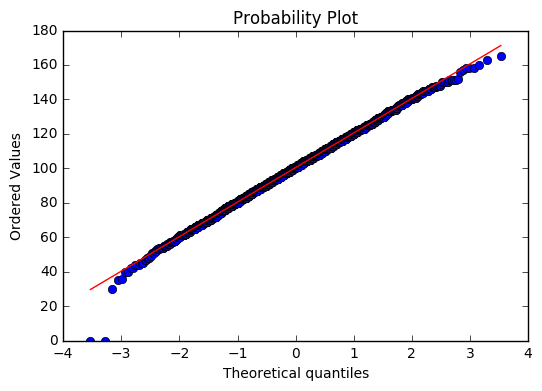

In [123]:
probplot(data.day_calls, plot=plt)

((array([-3.5297919 , -3.28786833, -3.15418238, ...,  3.15418238,
          3.28786833,  3.5297919 ]),
  array([ 0.05,  0.05,  0.05, ...,  0.89,  0.91,  0.96])),
 (0.1386170802069337, 0.48423642364236419, 0.99960504839853315))

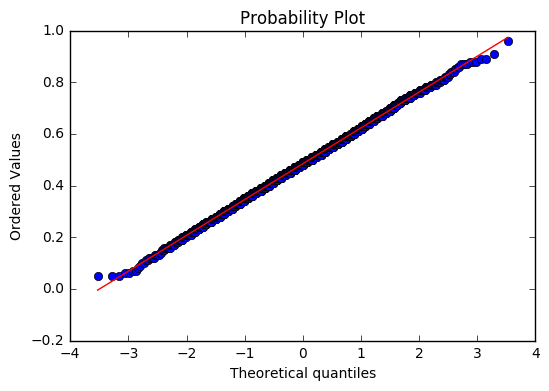

In [124]:
probplot(data.mes_estim, plot=plt)

### 8

In [136]:
def cramers_stat(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)
    print chi2[1]
    n = confusion_matrix.sum()
    return np.sqrt(chi2[0] / (n*(min(confusion_matrix.shape)-1)))

In [129]:
table = pd.pivot_table(data_treat[['state','churn']], index='state', columns='churn', aggfunc=len, fill_value=0)
table

churn,False.,True.
state,,
AK,19,1
AL,25,5
AR,11,5
AZ,17,2
CA,10,5
CO,17,5
CT,25,5
DC,18,1
DE,16,1


In [137]:
print cramers_stat(table)

0.709759004278
churn
False.    0.219180
True.     0.494709
dtype: float64


### 9

In [142]:
table01 = data.loc[data.treatment.isin((0,1)), ['treatment',"churn"]].pivot_table(index="treatment", columns="churn", aggfunc=len)

In [143]:
chi2_contingency(table01)

(1.3135522978703889,
 0.25175249831939217,
 1L,
 array([[ 957.71524664,  175.28475336],
        [ 927.28475336,  169.71524664]]))

In [144]:
table21 = data.loc[data.treatment.isin((2,1)), ['treatment',"churn"]].pivot_table(index="treatment", columns="churn", aggfunc=len)
chi2_contingency(table21)

(6.4435991416199307,
 0.011135281386020091,
 1L,
 array([[ 938.43363636,  158.56636364],
        [ 943.56636364,  159.43363636]]))

In [145]:
table20 = data.loc[data.treatment.isin((2,0)), ['treatment',"churn"]].pivot_table(index="treatment", columns="churn", aggfunc=len)
chi2_contingency(table20)

(1.8371266221248259,
 0.17528809842137572,
 1L,
 array([[ 979.46735242,  153.53264758],
        [ 953.53264758,  149.46735242]]))

In [22]:
p_0 = data.loc[data.treatment==0, 'churn'].mean()
p_1 = data.loc[data.treatment==1, 'churn'].mean()
p_2 = data.loc[data.treatment==2, 'churn'].mean()

data_0 = data.loc[data.treatment==0, 'churn'].values
data_1 = data.loc[data.treatment==1, 'churn'].values
data_2 = data.loc[data.treatment==2, 'churn'].values
print p_0, p_1, p_2

0.145631067961 0.164083865087 0.125113327289


In [20]:
def proportions_diff_z_test(z_stat, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    if alternative == 'two-sided':
        return 2 * (1 - scipy.stats.norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        return scipy.stats.norm.cdf(z_stat)

    if alternative == 'greater':
        return 1 - scipy.stats.norm.cdf(z_stat)

In [24]:
def proportions_diff_z_stat_ind(sample1, sample2):
    n1 = len(sample1)
    n2 = len(sample2)
    
    p1 = float(sum(sample1)) / n1
    p2 = float(sum(sample2)) / n2 
    P = float(p1*n1 + p2*n2) / (n1 + n2)
    
    return (p1 - p2) / np.sqrt(P * (1 - P) * (1. / n1 + 1. / n2))

In [26]:
import scipy
print "p-value: %f" % proportions_diff_z_test(proportions_diff_z_stat_ind(data_0, data_1))

p-value: 0.228331


In [27]:
print "p-value: %f" % proportions_diff_z_test(proportions_diff_z_stat_ind(data_1, data_2))

p-value: 0.009348


In [28]:
print "p-value: %f" % proportions_diff_z_test(proportions_diff_z_stat_ind(data_0, data_2))

p-value: 0.156425
